In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.layers import Input,Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.activations import relu
from keras.utils import np_utils

In [9]:
data=pd.read_csv('./fashion-mnist_test.csv')

In [10]:
x=data.values
X=x[:,1:]
Y=x[:,0]

X=X/255.0
X=X.reshape(-1,28,28,1)

Y=np_utils.to_categorical(Y)
print(X.shape,Y.shape)

(10000, 28, 28, 1) (10000, 10)


In [22]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',strides=2))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',strides=2))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 64)          0         
__________

In [26]:
adam=Adam(lr=0.001)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [28]:
hist = model.fit(X,Y, epochs=20, shuffle=True, batch_size=64, validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 194us/step - loss: 0.3819 - acc: 0.8548 - val_loss: 0.3916 - val_acc: 0.8710
Epoch 2/20
8000/8000 [==============================] - 1s 157us/step - loss: 0.3729 - acc: 0.8582 - val_loss: 0.4027 - val_acc: 0.8645
Epoch 3/20
8000/8000 [==============================] - 1s 156us/step - loss: 0.3624 - acc: 0.8600 - val_loss: 0.3969 - val_acc: 0.8610
Epoch 4/20
8000/8000 [==============================] - 1s 156us/step - loss: 0.3657 - acc: 0.8600 - val_loss: 0.3998 - val_acc: 0.8670
Epoch 5/20
8000/8000 [==============================] - 1s 158us/step - loss: 0.3590 - acc: 0.8638 - val_loss: 0.3864 - val_acc: 0.8660
Epoch 6/20
8000/8000 [==============================] - 1s 158us/step - loss: 0.3392 - acc: 0.8722 - val_loss: 0.3753 - val_acc: 0.8715
Epoch 7/20
8000/8000 [==============================] - 1s 159us/step - loss: 0.3388 - acc: 0.8669 - val_loss: 0.3713 - val_acc: 0.8685


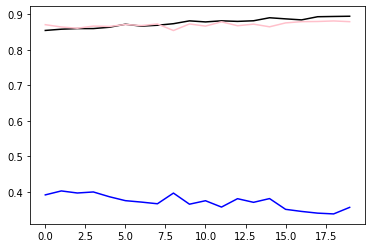

In [29]:
plt.plot(hist.history['val_loss'], color='blue')
plt.plot(hist.history['acc'], color='black')
plt.plot(hist.history['val_acc'], color='pink')
plt.show()